In [36]:
import pickle
import pandas as pd
import plotly.express as px
import seaborn as sns
fasttext_vocab = pickle.load(open('./preprocessed/attibute.token-freqs.fasttext.info.pickle', "rb"))

In [46]:
vocab_df1 = pd.DataFrame(columns=['model', 'field', 'tokens', 'uniq_tokens', '%tokens_found', '%uniq_found'])
vocab_df2 = pd.DataFrame(columns=['model', 'field', 'measure', 'value'])
for k, v in fasttext_vocab.items():
    i1 = vocab_df1.index.size
    i2 = vocab_df2.index.size
    field = k
    tokens = v['tokens']
    uniq = v['uniq']
    oovt = v['oov_tokens']
    oovu = v['oov_uniq']
    pcntid = 100*(tokens-oovt)/tokens
    pcntuid = 100*(uniq-oovu)/uniq
    vocab_df1.loc[i1] = ['fasttext', field, tokens, uniq, pcntid, pcntuid]
    vocab_df2.loc[i2] = ['fasttext', field, '%tokens_found', pcntid]
    vocab_df2.loc[i2+1] = ['fasttext', field, '%uniq_found', pcntuid]
print('df1', vocab_df1.index.size, vocab_df1.head())
print('df2', vocab_df2.index.size, vocab_df2.head())

df1 42       model                                  field  tokens  uniq_tokens  \
0  fasttext                       bio_material_sam   81947         9616   
1  fasttext  biological_material_preprocessing_sam  385063          103   
2  fasttext                   collection_label_sam    1826         1484   
3  fasttext                           comments_sam   10443          970   
4  fasttext                       conductivity_sam    7364           21   

   %tokens_found  %uniq_found  
0      70.543156     5.886023  
1      97.601951    77.669903  
2      10.350493     1.886792  
3      90.338025    53.608247  
4      98.302553    71.428571  
df2 84       model                                  field        measure      value
0  fasttext                       bio_material_sam  %tokens_found  70.543156
1  fasttext                       bio_material_sam    %uniq_found   5.886023
2  fasttext  biological_material_preprocessing_sam  %tokens_found  97.601951
3  fasttext  biological_material_pr

In [38]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

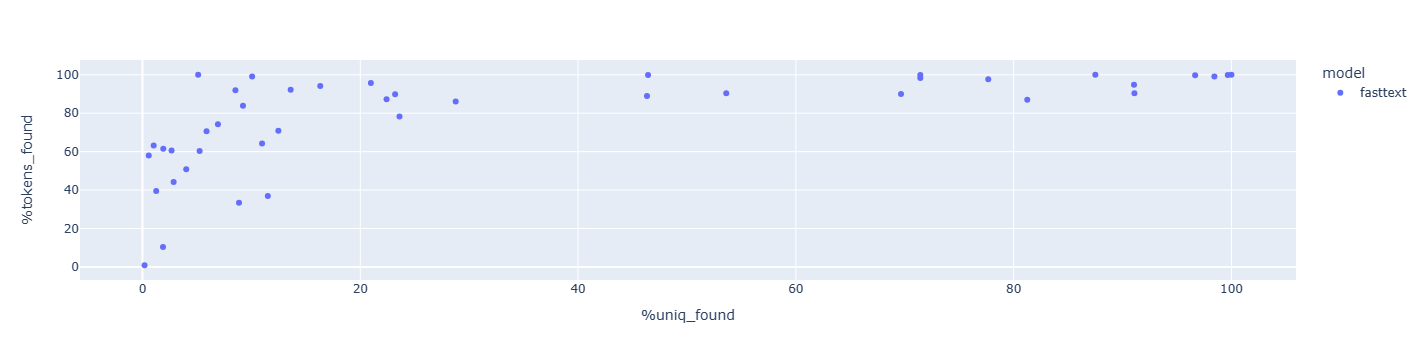

In [48]:
fig = px.scatter(vocab_df1, x='%uniq_found', y='%tokens_found', color='model', hover_data=['field', '%tokens_found', '%uniq_found'])
fig.show()

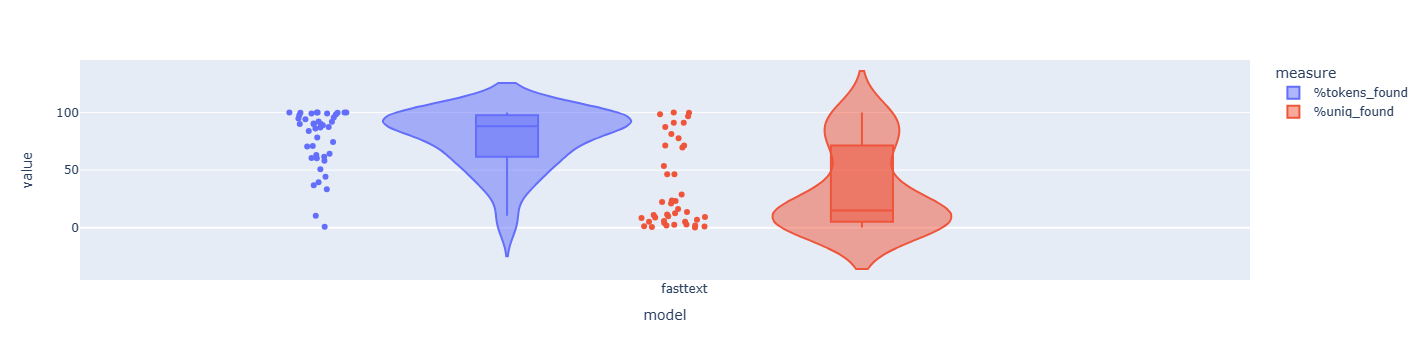

In [47]:
fig = px.violin(vocab_df2, y="value", x="model", color="measure", box=True, points="all",
          hover_data=vocab_df2.columns)
fig.show()